# YOLOv3 커스텀 데이터 학습

copy from https://articlearn.id/article/e5571bb0-how-to-train-yolov3-on-google-colab-to-de/

# 임포트

In [1]:
import cv2
import matplotlib.pyplot as plt
import glob


# Darknet 다운받아서 컴파일

## 프로젝트 다운로드

In [2]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15424, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 15424 (delta 0), reused 1 (delta 0), pack-reused 15423
Receiving objects: 100% (15424/15424), 14.06 MiB | 10.78 MiB/s, done.
Resolving deltas: 100% (10362/10362), done.


OpenCV, GPU, CuDNN 사용 관련 설정하고 컴파일

In [3]:
%cd darknet

/content/darknet


## 컴파일 설정 파일 수정

In [5]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

## 컴파일

In [6]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old ==

# 데이터 준비
- darknet/data/obj에 압축 풀기
- classes.names와 training.data 파일 생성
- training.txt 파일 생성


In [7]:
!wget https://github.com/dhrim/DMC_2022/raw/master/material/deep_learning/data/Raccoon.zip

--2022-06-30 00:55:41--  https://github.com/dhrim/DMC_2022/raw/master/material/deep_learning/data/Raccoon.zip
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/DMC_2022/master/material/deep_learning/data/Raccoon.zip [following]
--2022-06-30 00:55:41--  https://raw.githubusercontent.com/dhrim/DMC_2022/master/material/deep_learning/data/Raccoon.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5997816 (5.7M) [application/zip]
Saving to: ‘Raccoon.zip’

Raccoon.zip         100%[===================>]   5.72M  --.-KB/s    in 0.09s   

2022-06-30 00:55:41 (62.4 MB/s) - ‘Raccoon.zip’ saved [599781

## 압축 풀기

In [8]:
!rm -rf data/obj
!mkdir data/obj
!unzip Raccoon.zip -d data/obj/Raccoon

Archive:  Raccoon.zip
   creating: data/obj/Raccoon/test/
  inflating: data/obj/Raccoon/test/_darknet.labels  
  inflating: data/obj/Raccoon/test/raccoon-57_jpg.rf.26f3fae218f26088f6a7405c58ae8020.jpg  
  inflating: data/obj/Raccoon/test/raccoon-57_jpg.rf.26f3fae218f26088f6a7405c58ae8020.txt  
  inflating: data/obj/Raccoon/test/raccoon-58_jpg.rf.ff9de9977475e0086e7ab582122c5167.jpg  
  inflating: data/obj/Raccoon/test/raccoon-58_jpg.rf.ff9de9977475e0086e7ab582122c5167.txt  
  inflating: data/obj/Raccoon/test/raccoon-59_jpg.rf.388d6dd8c9d5a6fc7ca75790e680c269.jpg  
  inflating: data/obj/Raccoon/test/raccoon-59_jpg.rf.388d6dd8c9d5a6fc7ca75790e680c269.txt  
  inflating: data/obj/Raccoon/test/raccoon-60_jpg.rf.cff8b797e6b5c9b716b6be70be2b6b33.jpg  
  inflating: data/obj/Raccoon/test/raccoon-60_jpg.rf.cff8b797e6b5c9b716b6be70be2b6b33.txt  
  inflating: data/obj/Raccoon/test/raccoon-61_jpg.rf.58c4f561336525f59d395ce21508523b.jpg  
  inflating: data/obj/Raccoon/test/raccoon-61_jpg.rf.58c4f561

## 학습 위한 설정 파일 생성

### data/obj.names

In [9]:
%%writefile data/obj.names
Racoon

Writing data/obj.names


In [10]:
!cat data/obj.names

Racoon

In [11]:
!cp data/obj.names data/coco.names

### data/obj.data

In [12]:
%%writefile data/obj.data
classes = 1
train = data/train.txt
valid = data/test.txt
names = /content/darknet/data/obj.names
backup = ./

Writing data/obj.data


In [13]:
!cat data/obj.data

classes = 1
train = data/train.txt
valid = data/test.txt
names = /content/darknet/data/obj.names
backup = ./

### data/train.txt


In [14]:
!ls -al data/obj/Raccoon/train

total 5292
drwxr-xr-x 2 root root 32768 Jan  6 10:37 .
drwxr-xr-x 5 root root  4096 Jun 30 00:55 ..
-rw-r--r-- 1 root root 29260 Jun  8  2021 raccoon-100_jpg.rf.e9338202a924dc489ffd94e0291a0f39.jpg
-rw-r--r-- 1 root root    78 Jun  8  2021 raccoon-100_jpg.rf.e9338202a924dc489ffd94e0291a0f39.txt
-rw-r--r-- 1 root root 34570 Jun  8  2021 raccoon-101_jpg.rf.a9e8a95f51d60d7d3b40d3243aa11afd.jpg
-rw-r--r-- 1 root root    78 Jun  8  2021 raccoon-101_jpg.rf.a9e8a95f51d60d7d3b40d3243aa11afd.txt
-rw-r--r-- 1 root root 30824 Jun  8  2021 raccoon-102_jpg.rf.d140a1fcbfc8d62c7ad37167714f79df.jpg
-rw-r--r-- 1 root root    78 Jun  8  2021 raccoon-102_jpg.rf.d140a1fcbfc8d62c7ad37167714f79df.txt
-rw-r--r-- 1 root root 45941 Jun  8  2021 raccoon-103_jpg.rf.7148e5c7d785760fe9cb6b7762180977.jpg
-rw-r--r-- 1 root root    77 Jun  8  2021 raccoon-103_jpg.rf.7148e5c7d785760fe9cb6b7762180977.txt
-rw-r--r-- 1 root root 19239 Jun  8  2021 raccoon-104_jpg.rf.e5f8de5f977a32d8a7f2223574ff2b72.jpg
-rw-r--r-- 1 root 

In [15]:
# ls -al data/obj/Raccoon 밑에 jpg 파일들이 있으면
# images_list = glob.glob("data/obj/laptops_labeled/*[jpg|png|jpeg]")
images_list = glob.glob("data/obj/Raccoon/train/*[jpg|png|jpeg]")

# ls -al data/obj 밑에 jpg 파일들이 있으면
# images_list = glob.glob("data/obj/*[jpg|png|jpeg]")

print(images_list)

# Create train.txt file
file = open("data/train.txt", "w") 
file.write("\n".join(images_list)) 
file.close() 

['data/obj/Raccoon/train/raccoon-100_jpg.rf.e9338202a924dc489ffd94e0291a0f39.jpg', 'data/obj/Raccoon/train/raccoon-48_jpg.rf.99c91ae214e78cb740bfd2bca7b82cfe.jpg', 'data/obj/Raccoon/train/raccoon-56_jpg.rf.48fecf103e4a4c814569b50facecf288.jpg', 'data/obj/Raccoon/train/raccoon-195_jpg.rf.438757fc784e4d9f04d8c257fa103283.jpg', 'data/obj/Raccoon/train/raccoon-124_jpg.rf.ddf799871eb7bc5ceca93b4de5665b19.jpg', 'data/obj/Raccoon/train/raccoon-167_jpg.rf.f10d27f483841a478c526980439c79d8.jpg', 'data/obj/Raccoon/train/raccoon-159_jpg.rf.f00562bbdf4852182fce5c33b9831501.jpg', 'data/obj/Raccoon/train/raccoon-127_jpg.rf.76bba62c5d0feb6fd7cfa725fc6dfd02.jpg', 'data/obj/Raccoon/train/raccoon-37_jpg.rf.7d902e8083bbdfc7d78c99ec0690019f.jpg', 'data/obj/Raccoon/train/raccoon-197_jpg.rf.feeda892bbf59049f5db5eecfb476ffd.jpg', 'data/obj/Raccoon/train/raccoon-180_jpg.rf.2a518477d077cb8a36c1af37d3b9a215.jpg', 'data/obj/Raccoon/train/raccoon-143_jpg.rf.d75bca7db247c692bfacd20a587832da.jpg', 'data/obj/Raccoon/

In [16]:
!cat data/train.txt

data/obj/Raccoon/train/raccoon-100_jpg.rf.e9338202a924dc489ffd94e0291a0f39.jpg
data/obj/Raccoon/train/raccoon-48_jpg.rf.99c91ae214e78cb740bfd2bca7b82cfe.jpg
data/obj/Raccoon/train/raccoon-56_jpg.rf.48fecf103e4a4c814569b50facecf288.jpg
data/obj/Raccoon/train/raccoon-195_jpg.rf.438757fc784e4d9f04d8c257fa103283.jpg
data/obj/Raccoon/train/raccoon-124_jpg.rf.ddf799871eb7bc5ceca93b4de5665b19.jpg
data/obj/Raccoon/train/raccoon-167_jpg.rf.f10d27f483841a478c526980439c79d8.jpg
data/obj/Raccoon/train/raccoon-159_jpg.rf.f00562bbdf4852182fce5c33b9831501.jpg
data/obj/Raccoon/train/raccoon-127_jpg.rf.76bba62c5d0feb6fd7cfa725fc6dfd02.jpg
data/obj/Raccoon/train/raccoon-37_jpg.rf.7d902e8083bbdfc7d78c99ec0690019f.jpg
data/obj/Raccoon/train/raccoon-197_jpg.rf.feeda892bbf59049f5db5eecfb476ffd.jpg
data/obj/Raccoon/train/raccoon-180_jpg.rf.2a518477d077cb8a36c1af37d3b9a215.jpg
data/obj/Raccoon/train/raccoon-143_jpg.rf.d75bca7db247c692bfacd20a587832da.jpg
data/obj/Raccoon/train/raccoon-13_jpg.rf.b553d6d2cc3f79

# 4. 사전 학습된 YOLOv3 모델 파일 다운로드

In [21]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2022-06-30 00:59:45--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  23.1MB/s    in 7.5s    

2022-06-30 00:59:53 (20.5 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# 5. 학습관련 설정 파일 수정

원 설정파일 yolov3.cfg를 yolv3_custom.cfg로 복사하고

복사한 설정파일을 수정

In [22]:
# 탐지 대상 클래스 수를 설정
CLASS_NUM = 1

In [23]:
!cp cfg/yolov3.cfg cfg/yolov3_custom.cfg

classes = CLASS_NUM
filters = (classes + 5) * 3
# max_batches = classes * 2000
max_batches = classes * 1000
steps1 = int(max_batches*0.8)
steps2 = int(max_batches*0.9)
# if max_batches < 6000:
#   max_batches = 6000

# Edit classes & filters
!sed -i 's/batch=1/batch=64/' cfg/yolov3_custom.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_custom.cfg
!sed -i 's/max_batches = 500200/max_batches = $max_batches/' cfg/yolov3_custom.cfg
!sed -i '610 s@classes=80@classes=$classes@' cfg/yolov3_custom.cfg
!sed -i '696 s@classes=80@classes=$classes@' cfg/yolov3_custom.cfg
!sed -i '783 s@classes=80@classes=$classes@' cfg/yolov3_custom.cfg
!sed -i '603 s@filters=255@filters=$filters@' cfg/yolov3_custom.cfg
!sed -i '689 s@filters=255@filters=$filters@' cfg/yolov3_custom.cfg
!sed -i '776 s@filters=255@filters=$filters@' cfg/yolov3_custom.cfg
!sed -i 's/steps=400000,450000/steps=$steps1,$steps2/' cfg/yolov3_custom.cfg

# 6. 학습 실행

학습된 모델은  ./yolov3_custom_last.weights 로 저장된다.

In [24]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show 
# !./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
 total_bbox = 64657, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.613506), count: 4, class_loss = 0.466837, iou_loss = 0.302168, total_loss = 0.769005 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000002, iou_loss = 0.000000, total_loss = 0.000002 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
 total_bbox = 64661, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.687749), count: 5, class_loss = 0.794761, iou_loss = 0.391901, total_loss = 1.186662 
v3 (mse loss, Normaliz

## 7. 탐지 실행

In [25]:
!./darknet detect cfg/yolov3_custom.cfg ./yolov3_custom_last.weights data/obj/Raccoon/test/raccoon-57_jpg.rf.26f3fae218f26088f6a7405c58ae8020.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 10

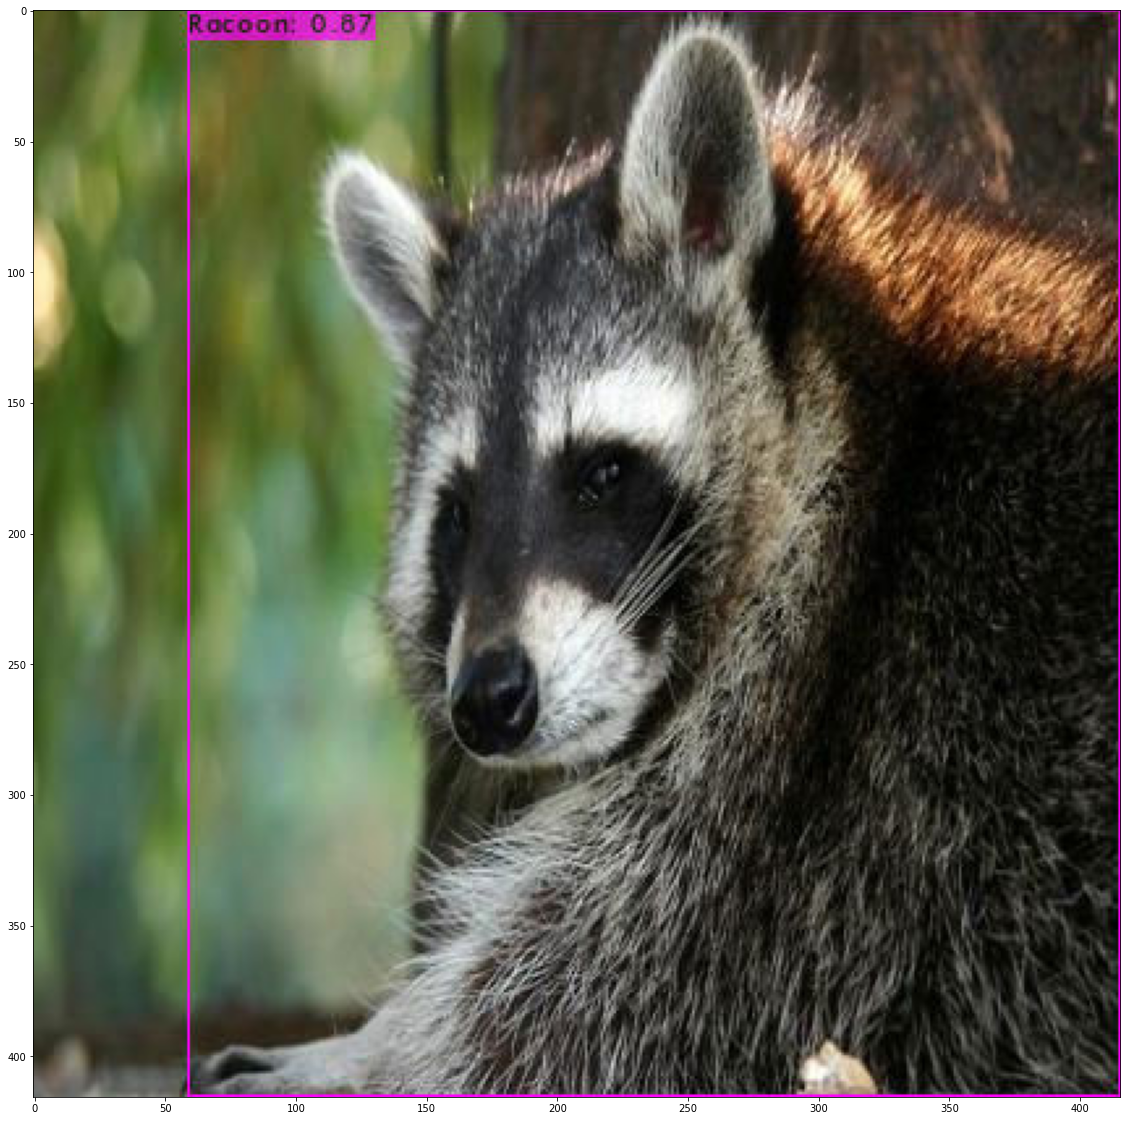

In [26]:
pred = plt.imread('predictions.jpg')
plt.figure(figsize=(20,20))
plt.imshow(pred)
plt.show()